##Problem Statement:
Fashion MNIST is a dataset comprising 60,000 training images and 10,000
testing images, each depicting various fashion items in a 28x28 grayscale format.
The dataset encompasses ten distinct categories of apparel. The primary aim of
this assignment is to develop a fully connected neural network (FCNN) that can
accurately classify these images into the correct fashion categories.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


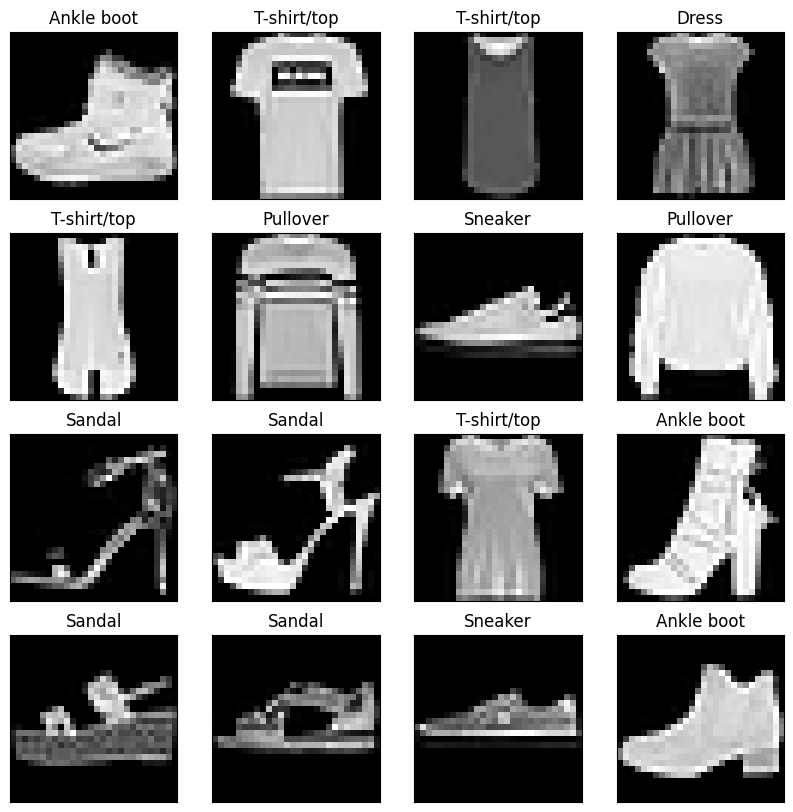

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Define the class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot some sample images with their labels
def plot_sample_images(X, y, class_names):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i], cmap='gray')  # Display images in grayscale
        plt.title(class_names[y[i]])   # Display the class label
    plt.show()

# Call the function to display sample images
plot_sample_images(X_train, y_train, class_names)


**Plot Bar Chart Showing Frequency of Each Fashion Category**

Distribution of fashion items Plot to check if there is any class imbalance.

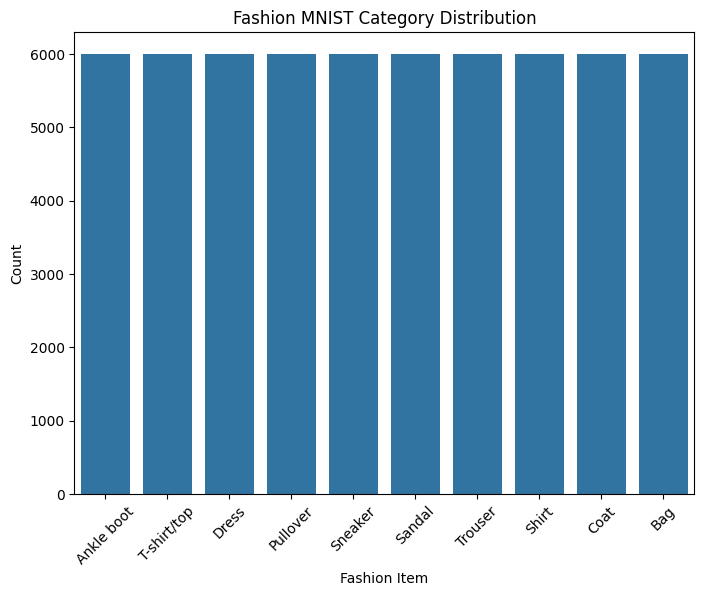

In [ ]:
import seaborn as sns
from collections import Counter

# Count the number of occurrences of each label in the training set
category_counts = Counter(y_train)

# Create a bar chart for the distribution of fashion categories
plt.figure(figsize=(8,6))
sns.barplot(x=[class_names[i] for i in category_counts.keys()],
            y=[category_counts[i] for i in category_counts.keys()])
plt.title('Fashion MNIST Category Distribution')
plt.xlabel('Fashion Item')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28)),            # Flatten 28x28 images into 784-dimensional vectors
    Dense(128, activation='relu'),            # Hidden layer with 128 units and ReLU activation
    Dense(64, activation='relu'),             # Hidden layer with 64 units and ReLU activation
    Dense(10, activation='softmax')           # Output layer with 10 units and softmax activation
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='sgd',                  # Use Stochastic Gradient Descent (SGD)
              loss='categorical_crossentropy',  # Loss function for multi-class classification
              metrics=['accuracy'])             # Track accuracy during training


In [ ]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,    # Use 20% of training data for validation
                    epochs=20,               # Train for 20 epochs
                    batch_size=32)           # Batch size of 32


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6593 - loss: 1.0782 - val_accuracy: 0.8028 - val_loss: 0.5642
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8202 - loss: 0.5191 - val_accuracy: 0.8055 - val_loss: 0.5543
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8382 - loss: 0.4692 - val_accuracy: 0.8459 - val_loss: 0.4439
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8489 - loss: 0.4372 - val_accuracy: 0.8520 - val_loss: 0.4217
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8565 - loss: 0.4139 - val_accuracy: 0.8583 - val_loss: 0.4056
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8611 - loss: 0.3972 - val_accuracy: 0.8547 - val_loss: 0.4103
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8658 - loss: 0.3881 - val_accuracy: 0.8636 - val_loss: 0.3921
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8700 - loss: 0.3738 - 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8759 - loss: 0.3592
Test Accuracy: 0.8730999827384949


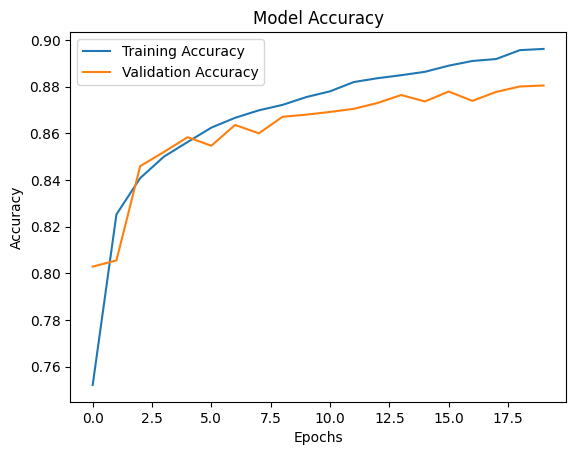

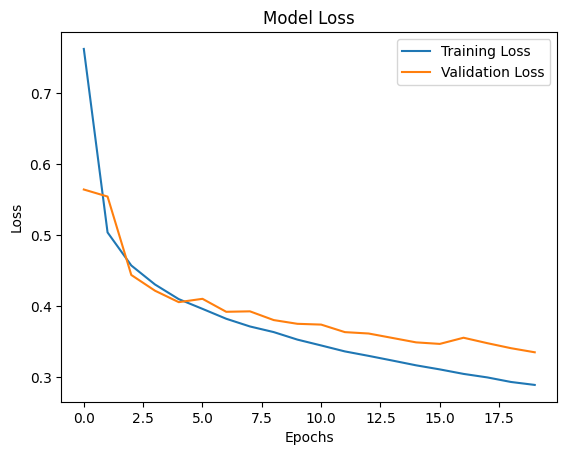

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Overall, the model is slightly overfitting after around 10 epochs, as the gap between training and validation accuracy increases a bit.